In [88]:
import numpy as np
from keras.datasets import mnist

In [89]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [90]:
print(X_test.shape)
print(X_train.shape)

(10000, 28, 28)
(60000, 28, 28)


2


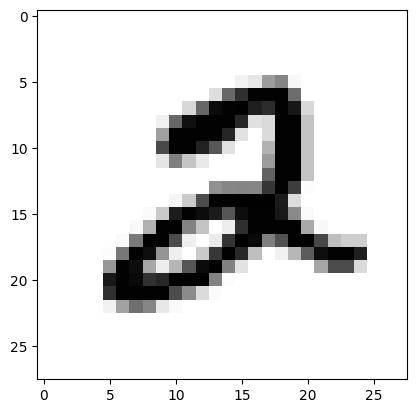

In [91]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5],cmap=plt.cm.binary)
print(y_train[5])

In [92]:
print(X_train.ndim)
print(X_train.dtype)

3
uint8


In [93]:
X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)
X_train /= 255
X_test /= 255

In [94]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [95]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
print(X_train.shape)

(60000, 784)


In [97]:
print(X_train.ndim)

2


In [98]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test)

In [99]:
print(y_train[3])
print(y_train.shape)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(60000, 10)


In [100]:
from keras.models import Sequential
from keras.layers import Dense,activation,LeakyReLU
model=Sequential()
model.add(Dense(units=128,activation="relu",kernel_initializer="uniform",input_shape=(784,)))
model.add(Dense(units=256,activation="relu",kernel_initializer="uniform"))
model.add(Dense(units=256,activation="relu",kernel_initializer="uniform"))
model.add(Dense(units=128,activation="relu",kernel_initializer="uniform"))
model.add(Dense(units=64,activation="relu",kernel_initializer="uniform"))
model.add(Dense(units=10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [101]:
model_fit=model.fit(X_train,y_train,validation_split=0.1,epochs=50,batch_size=128)

Epoch 1/50
422/422 [==============================] - 15s 33ms/step - loss: 0.5105 - accuracy: 0.8411 - val_loss: 0.1904 - val_accuracy: 0.9437
Epoch 2/50
422/422 [==============================] - 10s 24ms/step - loss: 0.1690 - accuracy: 0.9499 - val_loss: 0.1234 - val_accuracy: 0.9638
Epoch 3/50
422/422 [==============================] - 11s 26ms/step - loss: 0.1143 - accuracy: 0.9664 - val_loss: 0.1027 - val_accuracy: 0.9692
Epoch 4/50
422/422 [==============================] - 21s 50ms/step - loss: 0.0895 - accuracy: 0.9734 - val_loss: 0.0929 - val_accuracy: 0.9742
Epoch 5/50
422/422 [==============================] - 10s 23ms/step - loss: 0.0694 - accuracy: 0.9789 - val_loss: 0.0859 - val_accuracy: 0.9760
Epoch 6/50
422/422 [==============================] - 15s 36ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0936 - val_accuracy: 0.9757
Epoch 7/50
422/422 [==============================] - 14s 32ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0880 - val_accuracy:

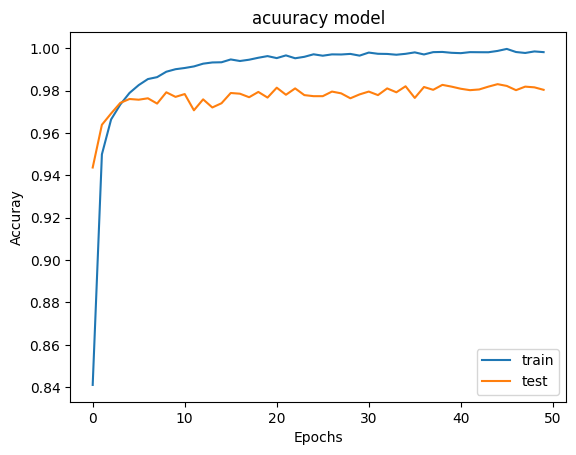

In [102]:
plt.plot(model_fit.history["accuracy"])
plt.plot(model_fit.history["val_accuracy"])
plt.title("acuuracy model")
plt.xlabel("Epochs")
plt.ylabel("Accuray")
plt.legend(["train","test"],loc="lower right")



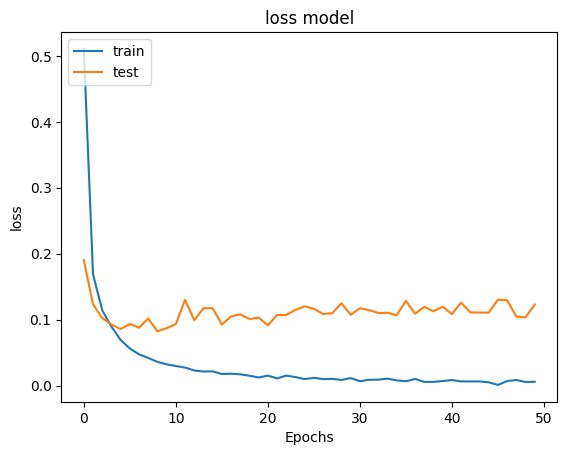

In [103]:
plt.plot(model_fit.history["loss"])
plt.plot(model_fit.history["val_loss"])
plt.title("loss model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["train","test"],loc="upper left")

In [104]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print('Test accuracy:', round(test_acc,3))
print('Test loss:', round(test_loss,3))

313/313 [==============================] - 6s 18ms/step - loss: 0.1154 - accuracy: 0.9796
Test accuracy: 0.98
Test loss: 0.115


313/313 [==============================] - 4s 12ms/step


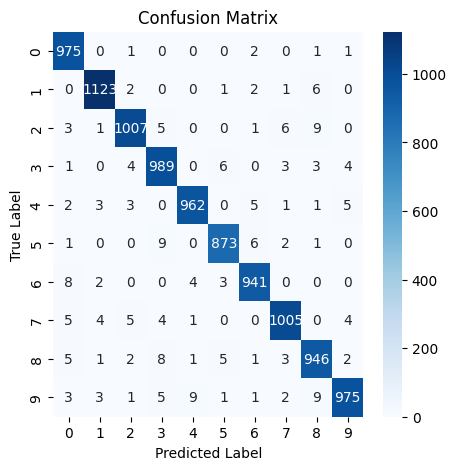

In [105]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred=model.predict(X_test)
y_pred_class=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
cm=confusion_matrix(y_true,y_pred_class)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [106]:
print(f" classification_report \n{classification_report(y_true,y_pred_class,digits=4)}")

 classification_report 
              precision    recall  f1-score   support

           0     0.9721    0.9949    0.9834       980
           1     0.9877    0.9894    0.9886      1135
           2     0.9824    0.9758    0.9791      1032
           3     0.9696    0.9792    0.9744      1010
           4     0.9846    0.9796    0.9821       982
           5     0.9820    0.9787    0.9803       892
           6     0.9812    0.9823    0.9817       958
           7     0.9824    0.9776    0.9800      1028
           8     0.9693    0.9713    0.9703       974
           9     0.9839    0.9663    0.9750      1009

    accuracy                         0.9796     10000
   macro avg     0.9795    0.9795    0.9795     10000
weighted avg     0.9796    0.9796    0.9796     10000

